In [9]:
path = 'data_project2.csv'

# Studenti

Nikola Vukotic
Jelena Jakimov

# DataSet

https://www.kaggle.com/singhakash/human-activity-recognition-using-smart-phone

# Importovanje paketa

In [54]:
import pandas as pd
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from kneed import KneeLocator
from numpy import mean
from numpy import median

In [4]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\nikol\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [106]:
def plot3DClusters(data, labels):
    number_of_clusters = len(set(labels))
    plt.figure(figsize = (14,14))
    ax = plt.axes(projection='3d')
    for cluster in set(labels):
        cluster_mask = [elem == cluster for elem in labels]
        
        zdata = data.iloc[cluster_mask, 0]
        xdata = data.iloc[cluster_mask, 1]
        ydata = data.iloc[cluster_mask, 2]
        ax.scatter3D(xdata, ydata, zdata)

# Ucitavanje data seta

In [60]:
data_df = pd.read_csv(path, header=None)

# Describing the Data

In [61]:
data_df.shape

(10300, 562)

In [62]:
data_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,561
count,10299.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,...,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000,10300.000000
mean,3045.267210,0.274321,-0.017645,-0.108720,-0.607434,-0.509753,-0.612519,-0.632949,-0.524966,-0.614153,...,0.180191,-0.244971,-0.563951,0.061491,0.056531,0.071662,0.044859,-0.442299,0.117521,0.000090
std,2100.917321,0.067679,0.038457,0.056956,0.440111,0.502186,0.407409,0.418449,0.489823,0.407944,...,5.433462,5.451371,5.463690,5.469015,5.486818,5.512798,5.509740,5.526716,5.515832,5.524926
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1287.000000,0.262590,-0.024901,-0.121019,-0.992360,-0.976986,-0.979132,-0.993293,-0.977011,-0.979054,...,-0.019461,-0.536170,-0.841827,-0.124691,-0.287015,-0.493106,-0.388979,-0.817271,0.002170,-0.131872
50%,2574.000000,0.277171,-0.017162,-0.108595,-0.942995,-0.834949,-0.850506,-0.948234,-0.843576,-0.844868,...,0.136284,-0.335077,-0.703367,0.008156,0.007704,0.017382,-0.007138,-0.715616,0.182034,-0.003870
75%,4776.500000,0.288347,-0.010618,-0.097589,-0.250278,-0.057279,-0.278644,-0.302009,-0.087287,-0.288119,...,0.288991,-0.113093,-0.487871,0.149058,0.291629,0.536243,0.366129,-0.521488,0.250822,0.102998
max,7351.000000,1.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,...,551.000000,552.000000,553.000000,554.000000,555.000000,556.000000,557.000000,558.000000,559.000000,560.000000


# Data wrangling

In [63]:
data_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,561
0,NaN,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,...,551.000000,552.000000,553.000000,554.000000,555.000000,556.000000,557.000000,558.000000,559.000000,560.000000
1,0.0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
2,1.0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
3,2.0,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
4,3.0,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
5,4.0,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
6,5.0,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,...,0.019953,-0.545410,-0.844619,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126
7,6.0,0.279454,-0.019641,-0.110022,-0.996921,-0.967186,-0.983118,-0.997003,-0.966097,-0.983116,...,0.145844,-0.217198,-0.564430,-0.212754,-0.230622,0.014637,-0.189512,-0.852150,0.182170,-0.043010
8,7.0,0.277432,-0.030488,-0.125360,-0.996559,-0.966728,-0.981585,-0.996485,-0.966313,-0.982982,...,0.136382,-0.082307,-0.421715,-0.020888,0.593996,-0.561871,0.467383,-0.851017,0.183779,-0.041976
9,8.0,0.277293,-0.021751,-0.120751,-0.997328,-0.961245,-0.983672,-0.997596,-0.957236,-0.984379,...,0.314038,-0.269401,-0.572995,0.012954,0.080936,-0.234313,0.117797,-0.847971,0.188982,-0.037364


# Navigating DataFrames

In [64]:
data_df.iloc[0]

0        NaN
1        0.0
2        1.0
3        2.0
4        3.0
       ...  
557    556.0
558    557.0
559    558.0
560    559.0
561    560.0
Name: 0, Length: 562, dtype: float64

In [65]:
data_df.iloc[1:5]

,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,561
1,0.0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
2,1.0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
3,2.0,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
4,3.0,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663


In [66]:
data_df.iloc[:4]

,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,561
0,NaN,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,...,551.000000,552.000000,553.000000,554.000000,555.000000,556.000000,557.000000,558.000000,559.000000,560.000000
1,0.0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
2,1.0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
3,2.0,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118


# Finding the Minimum, Maximum, Sum, Average, and Count

In [135]:
print('Maximum of column 2', data_df['2'].max())

KeyError: '2'

In [22]:
print('Maximum of column 2: ', data_df['2'].max())
print('Minimum of column 2: ', data_df['2'].min())
print('Mean of column 2: ', data_df['2'].mean())
print('Sum of column 2: ', data_df['2'].sum())
print('Count of column 2: ', data_df['2'].count())

Maximum of column 2:  1.0
Minimum of column 2:  -1.0
Mean of column 2:  -0.10892503273706378
Sum of column 2:  -1121.8189121590199
Count of column 2:  10299


In [23]:
data_df.count()

Unnamed: 0    10299
0             10299
1             10299
2             10299
3             10299
              ...  
556           10299
557           10299
558           10299
559           10299
560           10299
Length: 562, dtype: int64

#  Finding Unique Values

In [25]:
data_df['1'].unique()

array([-0.02029417, -0.01641057, -0.01946716, ...,  0.03007744,
        0.01846687, -0.01843651])

# Handling Missing Values

In [68]:
data_df.isnull().head(5)

,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,561
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
data_df.isnull()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,551,552,553,554,555,556,557,558,559,560
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10295,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10296,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10297,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
data_df.notnull()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,551,552,553,554,555,556,557,558,559,560
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
10295,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
10296,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
10297,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [31]:
data_df.isnull().sum()

Unnamed: 0    0
0             0
1             0
2             0
3             0
             ..
556           0
557           0
558           0
559           0
560           0
Length: 562, dtype: int64

In [69]:
data_df.dropna()

,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,561
1,0.0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
2,1.0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
3,2.0,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
4,3.0,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
5,4.0,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10295,2942.0,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
10296,2943.0,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
10297,2944.0,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
10298,2945.0,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


In [70]:
data_df = data_df.dropna()

In [71]:
data_df

,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,561
1,0.0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
2,1.0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
3,2.0,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
4,3.0,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
5,4.0,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10295,2942.0,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
10296,2943.0,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
10297,2944.0,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
10298,2945.0,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


# Drop duplicates

In [72]:
data_df.drop_duplicates()

,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,561
1,0.0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
2,1.0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
3,2.0,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
4,3.0,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
5,4.0,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10295,2942.0,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
10296,2943.0,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
10297,2944.0,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
10298,2945.0,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


In [73]:
data_df = data_df.drop_duplicates()

In [74]:
data_df

,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,561
1,0.0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
2,1.0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
3,2.0,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
4,3.0,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
5,4.0,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10295,2942.0,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
10296,2943.0,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
10297,2944.0,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
10298,2945.0,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


# Prikaz Histograma


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>,
        <AxesSubplot:title={'center':'2'}>,
        <AxesSubplot:title={'center':'3'}>,
        <AxesSubplot:title={'center':'4'}>,
        <AxesSubplot:title={'center':'5'}>,
        <AxesSubplot:title={'center':'6'}>,
        <AxesSubplot:title={'center':'7'}>,
        <AxesSubplot:title={'center':'8'}>,
        <AxesSubplot:title={'center':'9'}>,
        <AxesSubplot:title={'center':'10'}>,
        <AxesSubplot:title={'center':'11'}>,
        <AxesSubplot:title={'center':'12'}>,
        <AxesSubplot:title={'center':'13'}>,
        <AxesSubplot:title={'center':'14'}>,
        <AxesSubplot:title={'center':'15'}>,
        <AxesSubplot:title={'center':'16'}>,
        <AxesSubplot:title={'center':'17'}>,
        <AxesSubplot:title={'center':'18'}>,
        <AxesSubplot:title={'center':'19'}>,
        <AxesSubplot:title={'center':'20'}>,
        <Axe

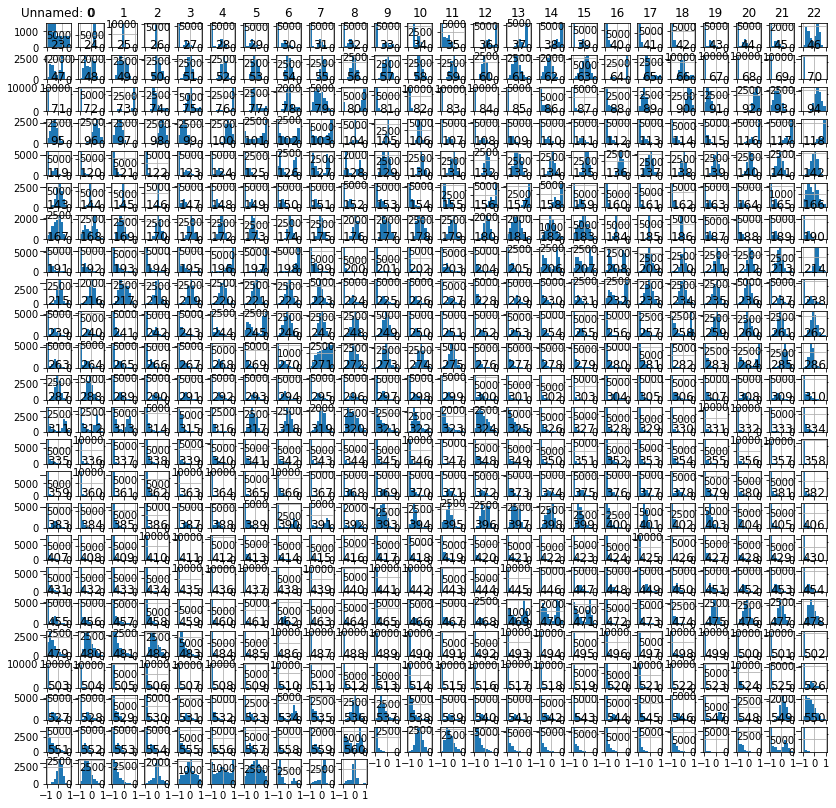

In [38]:
data_df.hist(figsize = (14,14))

In [98]:
def elbowMethod(x):
    score = []
    for cluster in range(1,15):
        kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=10)
        kmeans.fit(x)
        score.append(kmeans.inertia_)
        
    plt.plot(range(1,15), score)
    plt.title('The Elbow Method')
    plt.xlabel('no of clusters')
    plt.ylabel('wcss')
    plt.show()
    return score

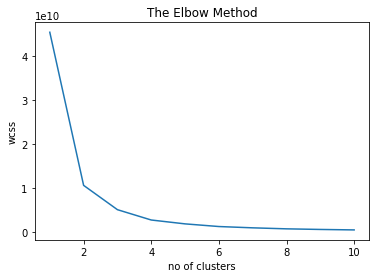

In [76]:
score = elbowMethod(data_df)
kn = KneeLocator(range(1,11), score, curve='convex', direction='decreasing')
PRED_NUM_CLUSTERS = kn.knee

In [77]:
result = mean(data_df)
print(result)

0      3045.267210
1         0.274347
2        -0.017743
3        -0.108925
4        -0.607784
          ...     
557       0.017683
558      -0.009219
559      -0.496522
560       0.063255
561      -0.054284
Length: 562, dtype: float64


In [78]:
result_median = median(data_df)
print("Median for dataset = ",result_median)

Median for dataset =  -0.7020720650000001


# Matrica korelacije atributa

<AxesSubplot:>

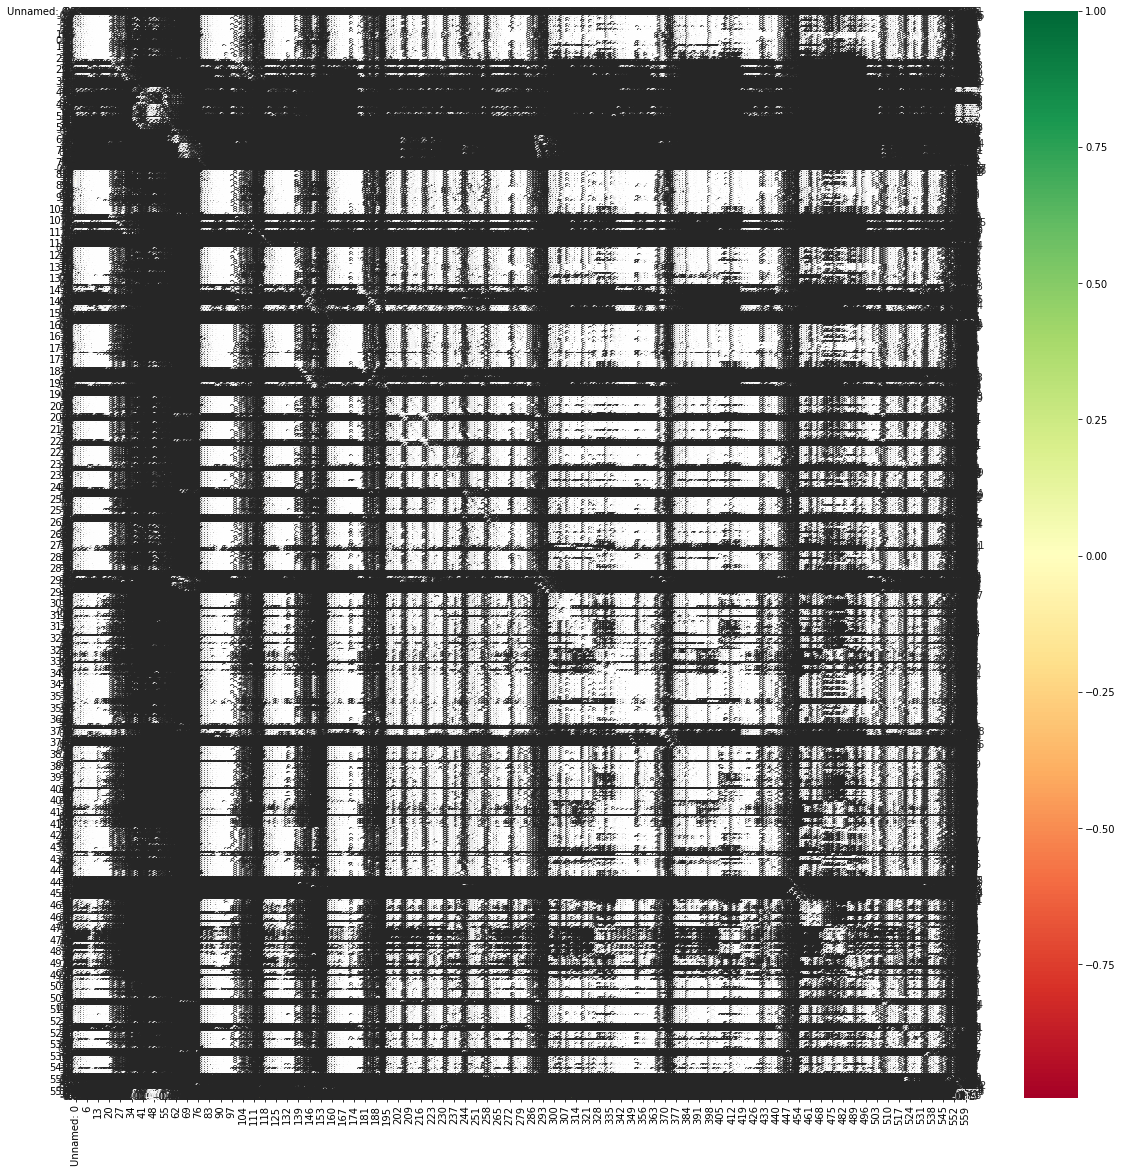

In [53]:
mat_corr = data_df.corr()
top_corr_features = mat_corr.index
plt.figure(figsize=(20, 20))
sns.heatmap(data_df[top_corr_features].corr(), annot=True, cmap = "RdYlGn")

# PCA Algoritam

In [81]:
features = StandardScaler().fit_transform(data_df)
pca = PCA(n_components = 0.99, whiten=True)
features_pca = pca.fit_transform(data_df)

print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_pca.shape[1])

Original number of features: 562
Reduced number of features: 1


In [80]:
data_df

,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,561
1,0.0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
2,1.0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
3,2.0,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
4,3.0,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
5,4.0,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10295,2942.0,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
10296,2943.0,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
10297,2944.0,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
10298,2945.0,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


In [83]:
df = data_df.iloc[:, 1:]

In [84]:
df


,1,2,3,4,5,6,7,8,9,10,...,552,553,554,555,556,557,558,559,560,561
1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
2,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
3,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
4,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
5,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10295,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
10296,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
10297,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
10298,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


In [119]:
features = StandardScaler().fit_transform(df)
pca = PCA(n_components = 0.99,whiten=True)
features_pca = pca.fit_transform(df)

print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_pca.shape[1])

Original number of features: 561
Reduced number of features: 157


In [91]:
features_pca

array([[-0.95329651, -0.44526765, -0.95689244, ..., -0.87349032,
         1.45770283, -0.17253063],
       [-0.95782659, -0.36021077, -1.23827115, ...,  0.97300225,
         0.06987276,  0.36204165],
       [-0.94666248, -0.18503522, -1.45520966, ...,  0.17252644,
         0.22593727, -0.33292231],
       ...,
       [ 0.78093557, -0.61785667,  0.32514291, ..., -0.53404104,
        -0.90037215, -0.44881673],
       [ 0.64459791, -0.79372988,  0.24887147, ...,  0.32976487,
         0.7613678 , -0.08037018],
       [ 0.68328537, -0.65194434,  0.16235644, ...,  0.57330594,
         0.59993553,  1.13545096]])

In [92]:
df_pca = pd.DataFrame(data=features_pca)

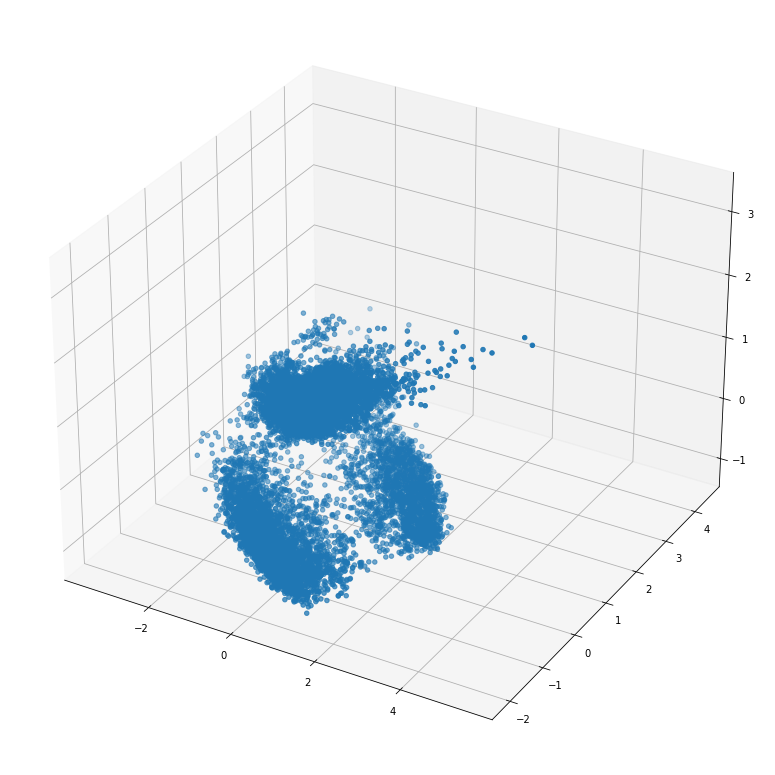

In [101]:
plt.figure(figsize = (14,14))
ax = plt.axes(projection='3d')
zdata = df_pca.iloc[:, 0]
xdata = df_pca.iloc[:, 1]
ydata = df_pca.iloc[:, 2]
ax.scatter3D(xdata, ydata, zdata);

In [93]:
df_pca

,0,1,2,3,4,5,6,7,8,9,...,147,148,149,150,151,152,153,154,155,156
0,-0.953297,-0.445268,-0.956892,1.743143,-0.984524,-0.579554,0.244613,1.107192,-1.834517,-0.262121,...,0.047017,0.139161,0.250312,0.737250,-0.353524,-1.012090,0.129939,-0.873490,1.457703,-0.172531
1,-0.957827,-0.360211,-1.238271,0.800541,-0.670329,1.228329,0.081106,-0.992766,-1.308842,0.822085,...,0.432075,0.266606,0.887805,-0.059768,0.692929,0.334991,0.235535,0.973002,0.069873,0.362042
2,-0.946662,-0.185035,-1.455210,0.607656,-0.005876,-0.032393,0.022814,0.111047,-0.304020,0.312387,...,0.051395,-0.381269,-0.084909,0.096362,-0.287001,0.860619,-0.528475,0.172526,0.225937,-0.332922
3,-0.981276,0.220404,-1.455927,0.330381,-0.847127,1.112583,0.860898,-0.614116,0.540813,-0.356802,...,-0.390971,-0.234968,0.052072,0.651503,0.616982,0.401563,-0.819549,0.471051,-0.669871,0.702503
4,-0.993100,0.347706,-1.602312,0.335663,-0.479776,0.406331,0.314785,-0.058575,0.588615,-0.366621,...,0.155689,0.507327,0.673149,0.030717,-0.677495,-1.226458,0.003845,0.220652,0.062750,-0.416764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.762210,-0.892775,0.366101,-0.659187,0.937628,0.056497,0.232577,-0.053473,1.959675,-0.902773,...,-0.072258,0.839850,-0.165548,0.535851,-1.053999,0.854185,-0.391324,1.359321,-1.682507,-0.408418
10295,0.861250,-0.589061,0.242851,-0.378943,1.160376,0.120278,-0.320370,-0.478352,0.262505,0.721909,...,1.468666,0.927935,0.048451,0.031447,0.126593,-0.005994,-1.082835,1.404189,-1.646525,-0.906690
10296,0.780936,-0.617857,0.325143,-0.189069,0.635726,0.156567,0.353410,0.381475,0.719246,-1.012418,...,-0.271305,0.541184,0.474080,1.913429,-0.873132,-0.531591,-0.417406,-0.534041,-0.900372,-0.448817
10297,0.644598,-0.793730,0.248871,-0.407091,0.897981,0.063672,1.116599,0.130789,1.402857,-1.513703,...,-0.731462,0.287867,-0.291325,1.011205,-0.953483,0.528376,-1.450586,0.329765,0.761368,-0.080370


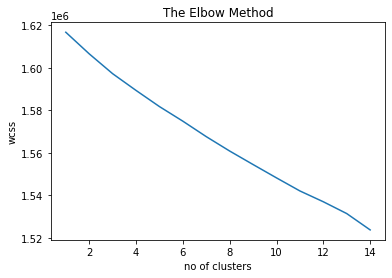

c:\users\nikol\appdata\local\programs\python\python38\lib\site-packages\kneed\knee_locator.py:304: UserWarning: No knee/elbow found
  warnings.warn("No knee/elbow found")


In [113]:
score = elbowMethod(df_pca)
kn = KneeLocator(range(1,15), score, curve='convex', direction='decreasing')
PRED_NUM_CLUSTERS = kn.knee

# KMeans Algoritam

In [131]:
scaler = StandardScaler()
features_std = scaler.fit_transform(df_pca)
cluster = KMeans(n_clusters=6, random_state=0)
model=cluster.fit(features_std)

cluster_labels = cluster.fit_predict(df_pca)
silhouette_score(df_pca, cluster_labels)

-0.04052548259663372

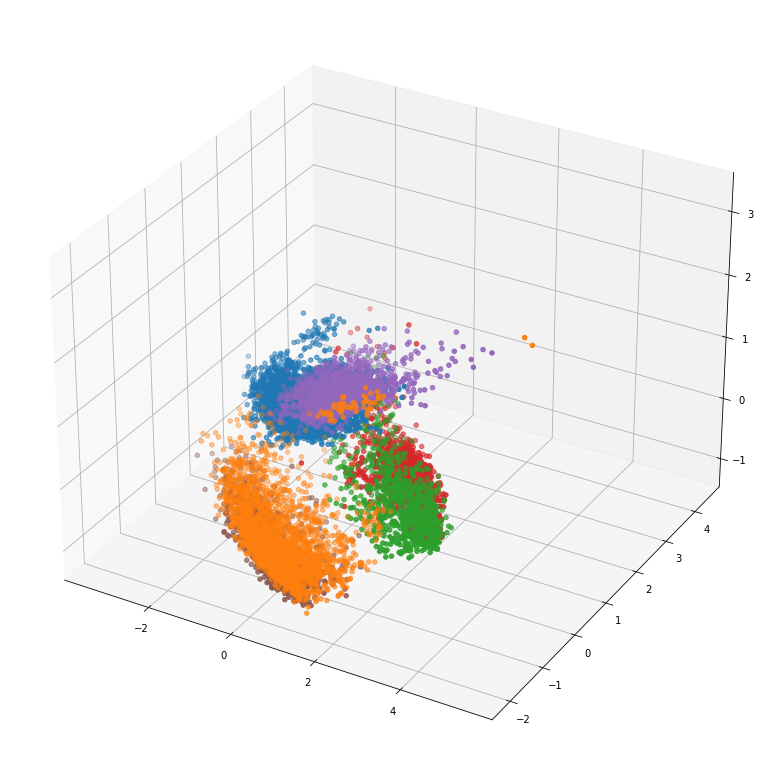

In [132]:
plot3DClusters(df_pca, cluster_labels)


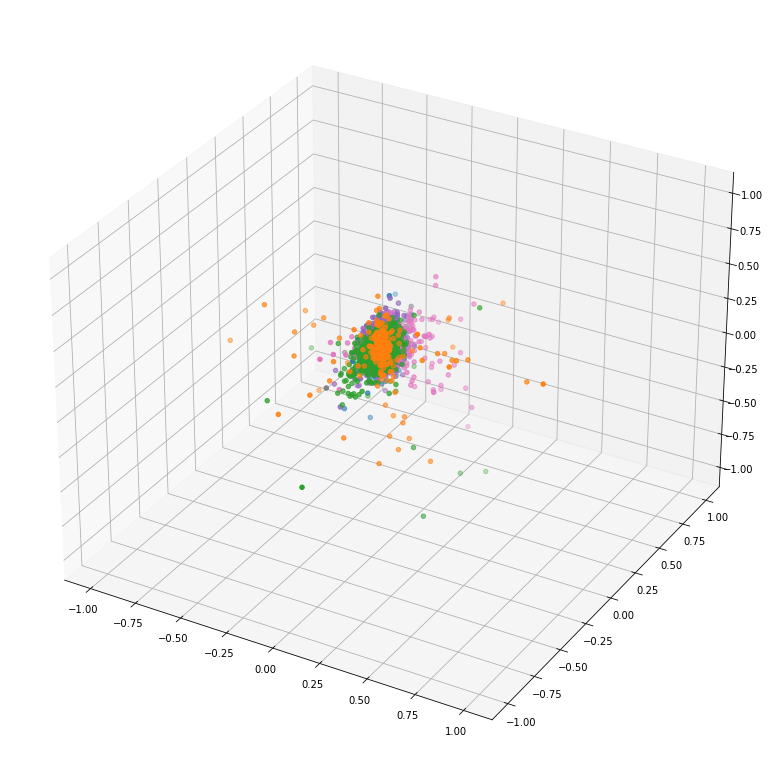

In [134]:
scaler = StandardScaler()
features_std = scaler.fit_transform(df)
cluster = KMeans(n_clusters=8, random_state=0)
model=cluster.fit(features_std)

cluster_labels = cluster.fit_predict(df)
silhouette_score(df, cluster_labels)

plot3DClusters(df, cluster_labels)
